<a href="https://colab.research.google.com/github/DataWhizAnushka/ds_assignments/blob/main/logisticregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LOGISTIC REGRESSION**

1. Data Exploration:

In [ ]:
## a. Load the dataset and perform exploratory data analysis (EDA).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                    ## We will use pandas for data manipulation , numpy for numerical & scientific computing and seaborn/matplotlib for visualizations.
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Titanic_train.csv")
df                                          ##loading dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
## b. Examine the features, their types, and summary statistics.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
## c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

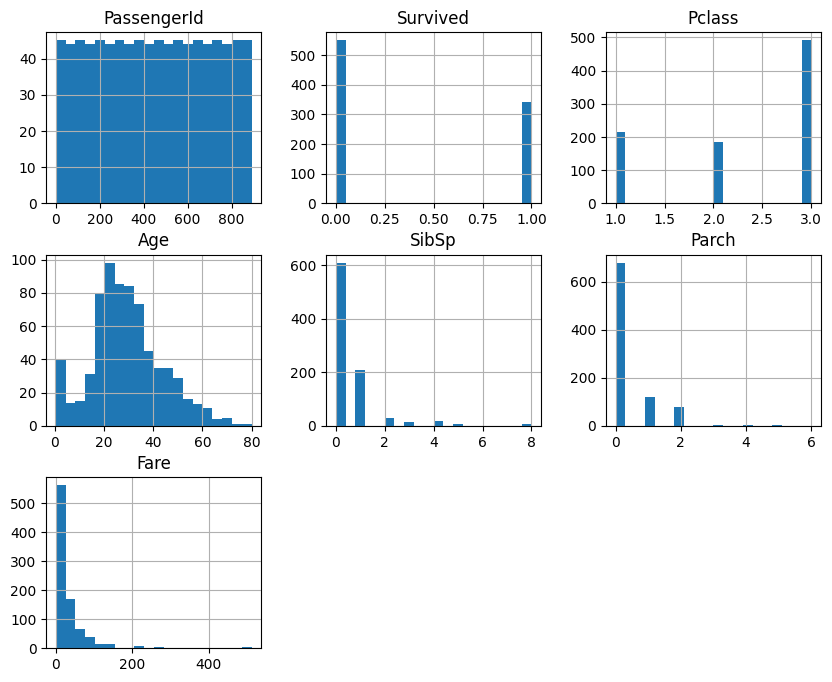

In [ ]:
# Histogram for numerical features
df.hist(bins=20, figsize=(10, 8))
plt.show()

In [ ]:
## Analyze any patterns or correlations observed in the data.

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])


In [ ]:
correlation_matrix = numeric_df.corr()

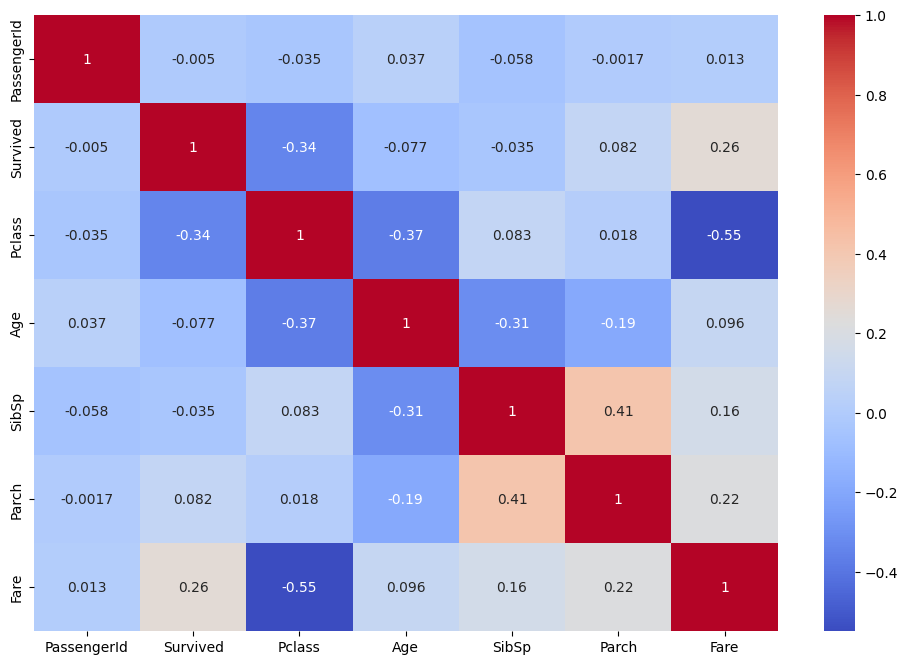

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

2. Data Preprocessing:

In [ ]:
## a. Handle missing values (e.g., imputation).

In [ ]:
# Checking for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Filling missing values for numerical features with mean/median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [ ]:
# Droping  columns with too many missing values or irrelevant columns
df.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)

In [ ]:
## b. Encode categorical variables.

In [ ]:
# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

3. Model Building:

In [ ]:
## a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
## b. Train the model using the training data.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define the target and features
X = df.drop(columns=['Survived'])
y = df['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
import pickle

# Save the trained model as a .pkl file
with open('logreg_model.pkl', 'wb') as file:
    pickle.dump(logreg, file)


4. Model Evaluation:

In [ ]:
## a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Predict on the test set
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC-AUC Score: {roc_auc}')

Accuracy: 0.8044692737430168
Precision: 0.7746478873239436
Recall: 0.7432432432432432
F1 Score: 0.7586206896551724
ROC-AUC Score: 0.8769626769626769


In [ ]:
## Visualize the ROC curve.

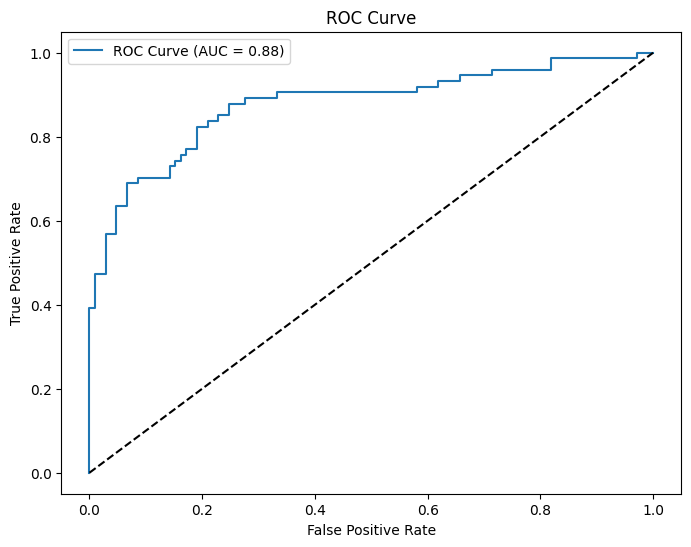

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

5. Interpretation:

In [ ]:
## a. Interpret the coefficients of the logistic regression model.

In [ ]:
coefficients = pd.DataFrame({            ## geting the coefficients of the logistic regression model
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
})

# Displaying the coefficients
coefficients.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
5,Fare,0.002579
0,PassengerId,0.000353
2,Age,-0.030608
7,Embarked_Q,-0.117107
4,Parch,-0.117254
3,SibSp,-0.286209
8,Embarked_S,-0.411826
1,Pclass,-0.932621
6,Sex_male,-2.605387


*b. Discuss the significance of features in predicting the target variable (survival probability in this case).*

The coefficients provide insights into the importance and direction of the impact of each feature on the target variable. Features with positive coefficients increase the probability of survival, while features with negative coefficients decrease it.

6. Deployment with Streamlit:

In [ ]:
!pip install streamlit

import streamlit as st
import pickle
import pandas as pd

# Load the trained model (adjust the file name as necessary)
with open('logreg_model.pkl', 'rb') as file:
    logreg = pickle.load(file)

# Define the Streamlit app
st.title('Titanic Survival Prediction')

# Input features from the user
pclass = st.selectbox('Pclass', [1, 2, 3])
age = st.slider('Age', 0, 80, 25)
sibsp = st.number_input('SibSp', 0, 10, 0)
parch = st.number_input('Parch', 0, 10, 0)
fare = st.number_input('Fare', 0.0, 500.0, 32.0)
sex = st.selectbox('Sex', ['male', 'female'])
embarked = st.selectbox('Embarked', ['C', 'Q', 'S'])

# Preparing the input data for prediction
input_data = pd.DataFrame({
    'PassengerId': [0],
    'Pclass': [pclass],
    'Age': [age],
    'SibSp': [sibsp],
    'Parch': [parch],
    'Fare': [fare],
    'Sex_male': [1 if sex == 'male' else 0],
    'Embarked_Q': [1 if embarked == 'Q' else 0],
    'Embarked_S': [1 if embarked == 'S' else 0]
})

# Making prediction
prediction = logreg.predict(input_data)[0]
probability = logreg.predict_proba(input_data)[0][1]

# Display the prediction
if prediction == 1:
    st.success(f'The model predicts that the passenger would survive with a probability of {probability:.2f}')
else:
    st.error(f'The model predicts that the passenger would not survive with a probability of {1 - probability:.2f}')


**Interview Questions:**


1. What is the difference between precision and recall?


Focus:

. Precision focuses on the correctness of positive predictions.

. Recall focuses on the completeness of positive predictions.

Use Cases:

. Precision is critical when the consequence of a false positive is more significant (e.g., spam detection, fraud detection).

. Recall is critical when the consequence of a false negative is more significant (e.g., disease detection, defect detection).


**2. What is cross-validation, and why is it important in binary classification?**

Cross-validation is a method to assess the performance of a predictive model by splitting the dataset into subsets, training the model on some and evaluating on others. In binary classification, it's crucial because it provides a reliable estimate of the model's performance, helps detect overfitting, optimizes hyperparameters, and ensures fair evaluation in imbalanced datasets.